# Keeno Glanville
# Week 3 part 2

In [ ]:
%matplotlib inline


# Davis Club

Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

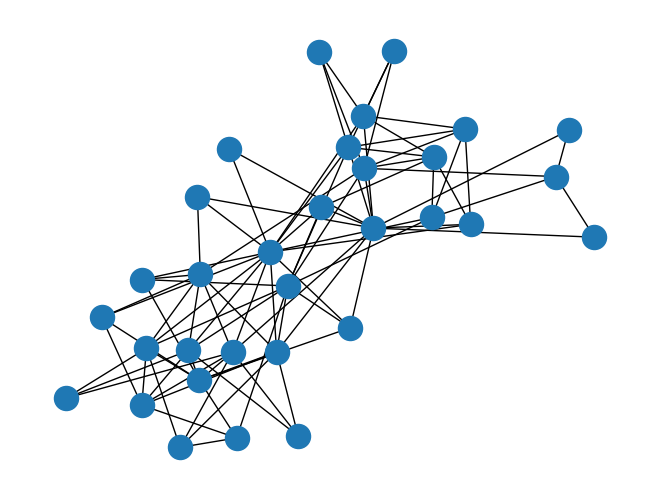

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

## Since this is a two-node data set I want to plot a bipartite graph

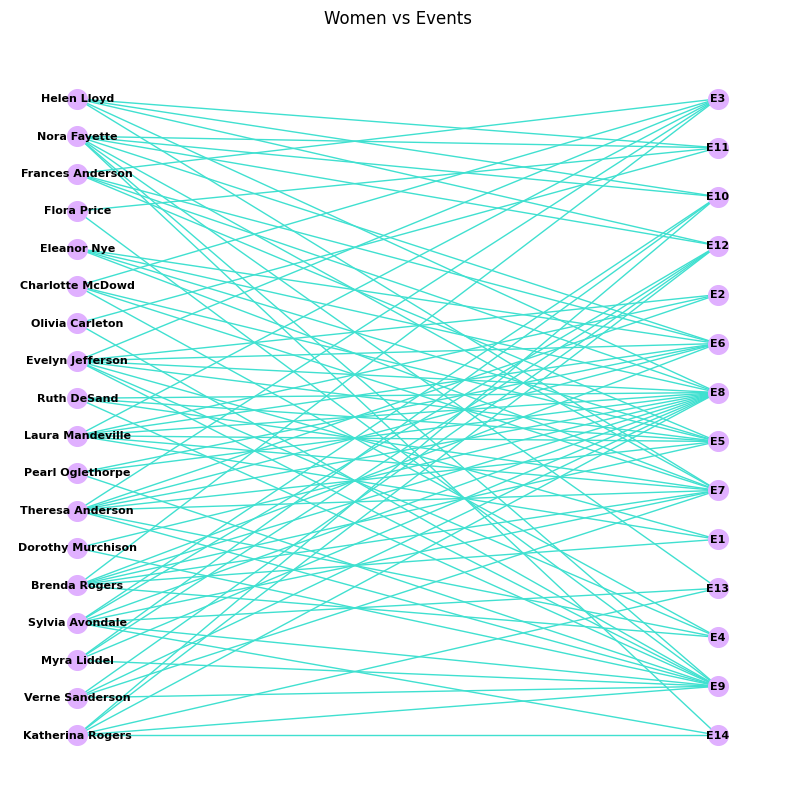

In [5]:
raceleft = women
pos = nx.bipartite_layout(G, raceleft)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos, with_labels=True, node_size=200, node_color='#E0B0FF', font_size=8, font_weight='bold', edge_color='#40E0D0')
plt.title("Women vs Events")
plt.axis('off')
plt.show()

In [13]:
print(women)

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


In [16]:
# We see that some of the women are more strong than others

# Calculate degree centrality for graph

import pandas as pd
degree_graph1 = dict(nx.degree(G, women))
deg_graph1 = pd.DataFrame(list(G.degree(women)), columns=['Woman', 'Degree'])


deg_graph1.sort_values('Degree', inplace=True, ascending=False)
deg_graph1.head(20)

,Woman,Degree
0,Evelyn Jefferson,8
2,Theresa Anderson,8
13,Nora Fayette,8
1,Laura Mandeville,7
3,Brenda Rogers,7
12,Sylvia Avondale,7
11,Katherina Rogers,6
14,Helen Lloyd,5
10,Myra Liddel,4
9,Verne Sanderson,4


In [22]:
degree_graph1 = dict(nx.degree(G, clubs))
deg_graph1 = pd.DataFrame(list(G.degree(clubs)), columns=['Event', 'Degree'])


deg_graph1.sort_values('Degree', inplace=True, ascending=False)
deg_graph1.head(20)

,Event,Degree
7,E8,14
8,E9,12
6,E7,10
4,E5,8
5,E6,8
2,E3,6
11,E12,6
9,E10,5
3,E4,4
10,E11,4


In [21]:
# Calculate eigenvector centrality for graph1
eigen_graph1 = nx.eigenvector_centrality_numpy(G)
eigen_graph1 = pd.DataFrame(list(eigen_graph1.items()), columns=['Name', 'Eigenvector graph1'])

eigen_graph1.sort_values('Eigenvector graph1', inplace=True, ascending=False)
eigen_graph1.head(10)

,Name,Eigenvector graph1
25,E8,0.358243
24,E7,0.271178
26,E9,0.268342
2,Theresa Anderson,0.262028
0,Evelyn Jefferson,0.236693
23,E6,0.231662
22,E5,0.227500
3,Brenda Rogers,0.221331
1,Laura Mandeville,0.218655
12,Sylvia Avondale,0.195992


# Inference
The data suggests that the women tendded to attend a plethora of events with some attending way mroe events than others. naturally so, other events would be more important than others. When eigenvector centrality was plotted there was a significicant event that stood out over the rest being Event 8